In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

## By split

In [2]:
splits = ['qm9_random', 'qm9_old_random', 'qm9_old_scaffold', 'qm9_scaffold']
architectures = ['E64_H4', 'E96_H4', 'E96_H8', 'E128_H8']
stacks = ['L8', 'C8', 'LC4', 'M8']

In [ ]:
fig, axs = plt.subplots(1, len(splits), figsize=(len(splits) * 3, 3), sharey=True)
if type(axs) is not np.ndarray: axs = [axs]

for ax, split in zip(axs, splits):
    for fname in os.listdir(f'./{split}'):
        if not fname.endswith('csv'): continue
        log = pd.read_csv(f'./{split}/{fname}')
        ax.plot(log['validation_r2'], label=fname[:-4])
        #ax.set_ylim(0, 1)

    ax.set_title(split)
    ax.set_xlabel('Epoch')
    ax.legend()

plt.tight_layout()

## Graph Operators

In [ ]:
log_files = {
    'GIN': '../../gin/logs/E64H4D8.csv', 
    'GATv2': '../../gat/logs/E64H4D8.csv', 
    'SDPA': './qm9_scaffold/E64H4/8L.csv'
}

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))

for label, file in log_files.items():
    ax.plot(pd.read_csv(file)['validation_r2'], label=label)

ax.set_title('Local Graph Operators on QM9')
ax.set_xlabel('Epoch')
ax.legend()

plt.tight_layout()

## By architecture

In [3]:
split = 'qm9_scaffold'
architectures = ['E128_H8']
stacks = ['L8', 'C8', 'LC4', 'H8', 'T8', 'f8']

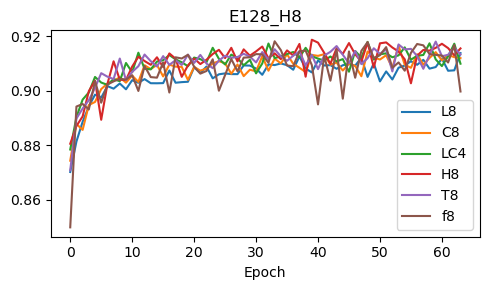

In [4]:
fig, axs = plt.subplots(1, len(architectures), figsize=(len(architectures) * 5, 3), sharey=True)
if type(axs) is not np.ndarray: axs = [axs]

for ax, architecture in zip(axs, architectures):
    max_score = 0
    for stack in stacks:
        datas = []
        for log_file in os.listdir(f'./{split}'):
            if not log_file.startswith(f'{architecture}_{stack}'): 
                continue
            data = pd.read_csv(f'./{split}/{log_file}')['validation_r2']
            if len(data) != 64: continue
            datas.append(data)

        ax.plot(np.stack(datas).mean(axis=0), label=stack)
        #ax.set_ylim(0, 1)

    ax.set_title(architecture)
    ax.set_xlabel('Epoch')
    ax.legend()

plt.tight_layout()

## Distributions

In [16]:
split = 'qm9_scaffold'
architecture = 'E128_H8'
stacks, labels = zip(*[
    ('L8', 'Masked Att.'), 
    #('G8', 'Global'), 
    ('P8', r'Fixed radial'), 
    #('C8', r''), 
    #('T8', r'$\frac{1}{r^3}$'), 
    #('f8', r'$\frac{1}{r^4}$'), 
    #('F8', r'$\frac{1}{r^5}$'), 
    ('p8', 'Inv. power (ours)'), 
    #('LC4', 'Block-wise Hybrid'), 
    #('H8', 'Head-wise Hybrid'), 
    #('M8', 'MLP'), 
    #('m8', 'MLP + V'), 
])

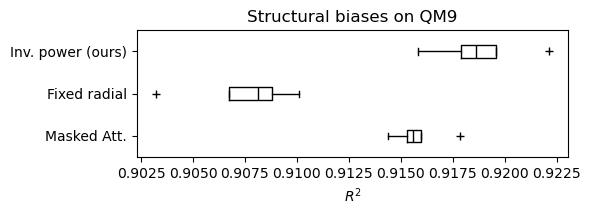

In [17]:
fig, ax = plt.subplots(figsize=(6, len(stacks) * 0.75), sharey=True)

data = [[] for _ in range(len(stacks))]
for i, stack in enumerate(stacks):
    folder_name = os.path.join('./logs/qm9_scaffold', architecture, stack)
    if not os.path.exists(folder_name) or len(os.listdir(folder_name)) == 0:
        continue

    for log_file in os.listdir(folder_name):
        if not log_file.endswith('.csv'): continue
        log_path = os.path.join(folder_name, log_file)
        scores = pd.read_csv(log_path)['validation_r2']
        bests = scores.sort_values()[-4:].mean()
        data[i].append(bests)

ax.boxplot(
    x=data, tick_labels=labels, 
    vert=False, sym='+', 
    medianprops={'color': 'black'}
)
ax.set_xlabel('$R^2$')
ax.set_title('Structural biases on QM9')

plt.tight_layout()

## By stack

In [ ]:
fig, axs = plt.subplots(1, len(stacks), figsize=(len(stacks) * 3, 3), sharey=True)
if len(axs) == 1: axs == axs[axs]

for ax, stack in zip(axs, stacks):
    max_score = 0
    for architecture in architectures:
        log = pd.read_csv(
            f'./{dataset}/{architecture}/{stack}.csv'
        )
        ax.plot(log['validation_r2'], label=architecture)

    ax.set_title(stack)
    ax.legend()

plt.tight_layout()

## By split

In [ ]:
fig, axs = plt.subplots(1, len(splits), figsize=(len(splits) * 3, 3), sharey=True)
if len(axs) == 1: axs == axs[axs]

for ax, split in zip(axs, splits):
    max_score = 0
    for stack in stacks:
        log = pd.read_csv(
            f'./{dataset}/E96H8/{stack}.csv'
        )
        ax.plot(log['validation_r2'], label=stack)

    ax.set_title(split)
    ax.legend()

plt.tight_layout()